In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from os import path
import itertools
from matplotlib.ticker import ScalarFormatter, LogFormatter, LogFormatterExponent, LogFormatterMathtext

In [2]:
%matplotlib inline

In [3]:
from tools import FixedOrderFormatter

In [4]:
!ls data/Reddit/

biracial.csv	 monocultural.csv   multiculturalism.csv  multiracial.csv
interracial.csv  multicultural.csv  multiethnic.csv


In [67]:
def load_reddit_database():
    df = pd.read_csv("data/Reddit/biracial.csv") 

    for file in glob.glob("data/Reddit/*csv"):
      filename = path.basename(file)
      if filename == "biracial.csv": continue
      new_column = pd.read_csv(file)
      print(filename)
      df = pd.merge(df, new_column, on="date", how="outer")
    df.set_index("date", inplace=True)
    df.set_index(pd.to_datetime(df.index), inplace=True)
    df  = df.resample('M', how='sum')
    return df

In [68]:
reddit = load_reddit_database()

multicultural.csv
multiculturalism.csv
monocultural.csv
multiethnic.csv
interracial.csv
multiracial.csv


In [69]:
reddit.head()

,biracial,multicultural,multiculturalism,monocultural,multiethnic,interracial,multiracial
date,,,,,,,
2007-10-31,0,0,0.000036,0,0,0.000046,0
2007-11-30,0,0,0.000049,0,0,0.000000,0
2007-12-31,0,0,0.000032,0,0,0.000014,0
2008-01-31,0,0,0.000026,0,0,0.000000,0
2008-02-29,0,0,0.000037,0,0,0.000039,0


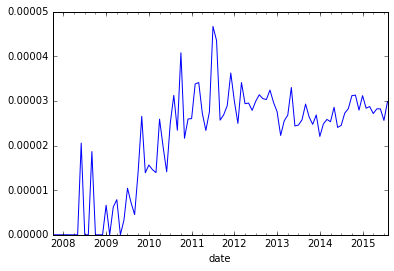

In [70]:
reddit.multicultural.plot(logy=False)

In [79]:
def plot(words):
    #markers = itertools.cycle(['s', 'D', '*', 'p', 'h', 'o', '+', 'd'])
    line_types = itertools.cycle(['-', '--', '-.'])
    df = reddit[words]
    df = pd.rolling_mean(df, 3)
    plt.figure(figsize=(16,6))

    for i,word in enumerate(words):
        plt.plot(df.index, df[word], next(line_types), linewidth=3,
                 color=str(i/float(len(words))))
    axis_1 = plt.gca()

    axis_1.set_yscale('log') # You can disable
    axis_1.set_ylim(ymin=1e-6) # You can disable
    axis_1.yaxis.set_major_formatter(LogFormatterMathtext())  # You can disable
    #axis_1.grid(True)

    font = {'family': "Times New Roman",
            'color': 'black',
           'size': 12}
    axis_1.set_ylabel("Probability", font)
    axis_1.set_xlabel("Year", font)
    #axis_1.yaxis.set_major_formatter(FixedOrderFormatter(-3)) # You can enable
    plt.legend(words, loc=2)

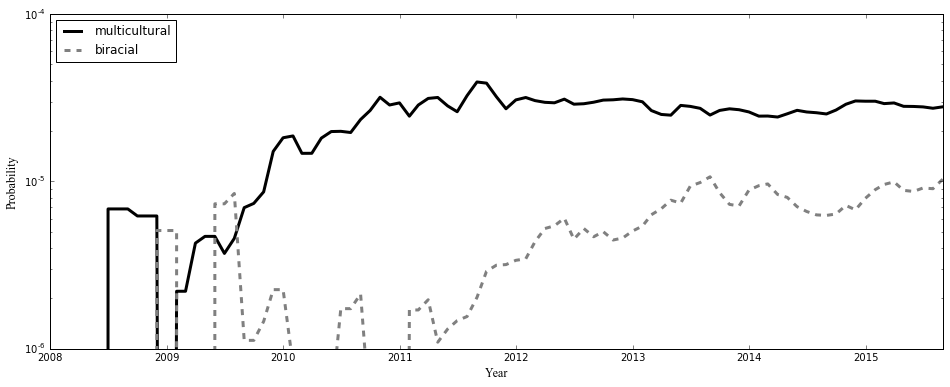

In [80]:
plot(["multicultural", "biracial"])